# IMDB RNN

This notebook explores classification task for IMDB dataset using RNN. 
Using feed-forward NN we achived score of 84%. 

In [23]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models, layers

# Load and preprocess data

We will padd all reviews to max_len words, since Keras requires that all reviews in the batch should have the same length

In [27]:
# 10K words
max_features = 10000
# Take only 500 first characters
max_len = 500
batch_size = 32

(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words=max_features)
print("There are {} train reviews".format(len(train_data)))
print("There are {} test reviews".format(len(test_data)))
print('Pad reviews (samples x time)')
x_train = sequence.pad_sequences(train_data, maxlen=max_len)
x_test = sequence.pad_sequences(test_data, maxlen=max_len)
print('input_train shape: {}'.format(x_train.shape))
print('input_test shape: {}'.format(x_test.shape))

There are 25000 train reviews
There are 25000 test reviews
Pad reviews (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


# Train

## Helper functions

In [24]:
def plot_loss(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values)+1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def plot_accuracy(history):
    history_dict = history.history
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values)+1)

    plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Use SimpleRNN layers

In [22]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.6680 - acc: 0.5766 - val_loss: 0.6058 - val_acc: 0.6618
Epoch 2/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.4205 - acc: 0.8167 - val_loss: 0.3809 - val_acc: 0.8424
Epoch 3/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.2899 - acc: 0.8832 - val_loss: 0.3763 - val_acc: 0.8420
Epoch 4/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2232 - acc: 0.9135 - val_loss: 0.3534 - val_acc: 0.8608
Epoch 5/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.1641 - acc: 0.9408 - val_loss: 0.4986 - val_acc: 0.7774
Epoch 6/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.1189 - acc: 0.9591 - val_loss: 0.5172 - val_acc: 0.8520
Epoch 7/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.0860 - acc: 0.9717 - val_loss: 0.4722 - val_acc:

### Plot loss

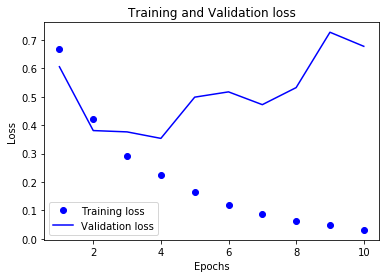

In [25]:
plot_loss(history)

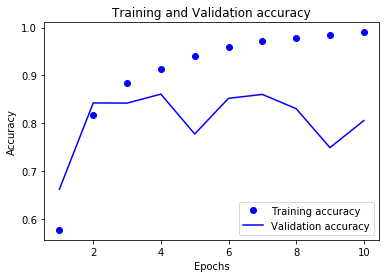

In [26]:
plot_accuracy(history)

In [28]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 16s 626us/step


[0.68519861616134647, 0.79920000000000002]

The score here is 80% which is not improvement over 84% using Feed-Forward network.

The problem is here with SimpleRNN layer which is doesn't really preserve history and we only selected first 500 words, not all review

# LSTM

In [29]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
model.evaluate(x_test, y_test)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 180s 9ms/step - loss: 0.4986 - acc: 0.7685 - val_loss: 0.3276 - val_acc: 0.8644
Epoch 2/10
20000/20000 [==============================] - 177s 9ms/step - loss: 0.2963 - acc: 0.8855 - val_loss: 0.2981 - val_acc: 0.8712
Epoch 3/10
20000/20000 [==============================] - 178s 9ms/step - loss: 0.2398 - acc: 0.9082 - val_loss: 0.3374 - val_acc: 0.8652
Epoch 4/10
20000/20000 [==============================] - 179s 9ms/step - loss: 0.2041 - acc: 0.9240 - val_loss: 0.3557 - val_acc: 0.8414
Epoch 5/10
20000/20000 [==============================] - 180s 9ms/step - loss: 0.1753 - acc: 0.9340 - val_loss: 0.3106 - val_acc: 0.8838
Epoch 6/10
20000/20000 [==============================] - 179s 9ms/step - loss: 0.1615 - acc: 0.9430 - val_loss: 0.3387 - val_acc: 0.8516
Epoch 7/10
20000/20000 [==============================] - 182s 9ms/step - loss: 0.1429 - acc: 0.9505 - val_loss: 0.3706 - v

[0.40653406555652616, 0.86724000000000001]

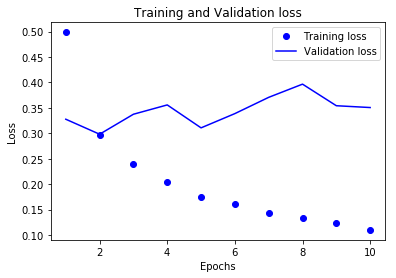

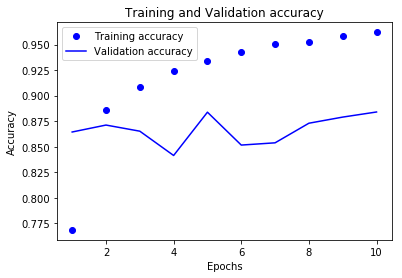

In [30]:
plot_loss(history)
plot_accuracy(history)

The best score is 86% which is improvement over SimpleRNN and Feed-Forward. But still it is far from the state of the art which is ~94%

Some additional notes:

  * We have a problem with overfitting.
  * No hyperparameters tuning

But the biggest problem is that analyzing the global, long-term structure (what LSTM's is good at) isn't helpful for sentiment analysis.

# Bidirectional RNN

This type of layer is frequently used for NLP tasks.

In [31]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
model.evaluate(x_test, y_test)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 358s 18ms/step - loss: 0.5305 - acc: 0.7455 - val_loss: 0.3864 - val_acc: 0.8512
Epoch 2/10
20000/20000 [==============================] - 328s 16ms/step - loss: 0.3211 - acc: 0.8723 - val_loss: 0.3358 - val_acc: 0.8738
Epoch 3/10
20000/20000 [==============================] - 341s 17ms/step - loss: 0.2441 - acc: 0.9067 - val_loss: 0.3003 - val_acc: 0.8744
Epoch 4/10
20000/20000 [==============================] - 349s 17ms/step - loss: 0.2076 - acc: 0.9231 - val_loss: 0.4181 - val_acc: 0.8390
Epoch 5/10
20000/20000 [==============================] - 329s 16ms/step - loss: 0.1860 - acc: 0.9323 - val_loss: 0.3280 - val_acc: 0.8766
Epoch 6/10
20000/20000 [==============================] - 333s 17ms/step - loss: 0.1609 - acc: 0.9407 - val_loss: 0.3480 - val_acc: 0.8714
Epoch 7/10
20000/20000 [==============================] - 332s 17ms/step - loss: 0.1483 - acc: 0.9462 - val_loss: 0.4

[0.52319401624202733, 0.83311999999999997]